# 안녕하세요^^ 
# AIVLE 미니 프로젝트에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

In [ ]:
# 필요 라이브러리부터 설치할께요.
!pip install pandas seaborn sklearn

---

---

# 1. 라이브러리 Import 및 데이터 불러오기

* sklearn 을 설치 하세요. 

* 관련 라이브러리들을 불러오세요

In [33]:
import pandas as pd

# 학습/평가 데이터 로딩
df_21 = pd.read_csv("train3.csv")
df_22 = pd.read_csv("test3.csv")

#### [실습문제1] 라이브러리 불러오기



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import * # scaler
import joblib

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import plot_tree, DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.metrics import * 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.tree import plot_tree
from sklearn.ensemble import *
from xgboost import plot_tree, XGBRegressor

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings    # 경고메시지 제외
warnings.filterwarnings(action='ignore')

In [3]:
# 시각화 한글폰트 설정
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

In [4]:
df_21.head()

,측정일시,SO2,CO,O3,NO2,PM10,PM25,hour,기온(°C),강수량(mm),...,현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C),PM10_t1
0,2021-10-01,0.003,0.6,0.002,0.039,31.0,18.0,1,18.7,0.0,...,998.8,1008.7,0.0,0.0,0.0,0,33.947368,2000,17.4,27.0
1,2021-10-01,0.003,0.6,0.002,0.035,27.0,16.0,2,18.3,0.0,...,998.9,1008.8,0.0,0.0,0.0,0,35.789474,2000,17.2,28.0
2,2021-10-01,0.003,0.6,0.002,0.033,28.0,18.0,3,17.7,0.0,...,998.1,1008.1,0.0,0.0,0.0,0,37.631579,2000,17.0,26.0
3,2021-10-01,0.003,0.6,0.002,0.030,26.0,16.0,4,17.4,0.0,...,997.9,1007.9,0.0,0.0,0.0,0,39.473684,2000,16.5,26.0
4,2021-10-01,0.003,0.5,0.003,0.026,26.0,16.0,5,17.2,0.0,...,998.4,1008.4,0.0,0.0,4.0,0,41.315789,1995,16.6,22.0


In [34]:
drop_cols = ['PM10', 'PM25', '측정일시']
train_data = df_21.drop(drop_cols, axis=1)
test_data = df_22.drop(drop_cols, axis=1)

In [35]:
train_data.head()

,SO2,CO,O3,NO2,hour,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),...,현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C),PM10_t1
0,0.002,0.5,0.022,0.016,1,-8.7,0.0,2.4,270.0,68,...,1016.4,1027.7,0.0,0.0,0.0,0,12.0,2000,-6.9,25.0
1,0.002,0.6,0.018,0.020,2,-9.1,0.0,1.6,270.0,69,...,1016.2,1027.5,0.0,0.0,0.0,0,12.0,2000,-7.1,27.0
2,0.002,0.6,0.013,0.025,3,-9.3,0.0,1.1,250.0,70,...,1016.8,1028.1,0.0,0.0,0.0,0,12.0,2000,-7.3,23.0
3,0.003,0.6,0.011,0.027,4,-9.3,0.0,0.3,0.0,71,...,1016.2,1027.5,0.0,0.0,0.0,0,12.0,2000,-7.5,24.0
4,0.003,0.6,0.008,0.032,5,-9.7,0.0,1.9,20.0,72,...,1015.6,1026.9,0.0,0.0,0.0,0,12.0,2000,-7.6,26.0


In [36]:
target = 'PM10_t1'
tx = train_data.drop(target, axis=1)
ty = train_data.loc[:, target]

In [37]:
test_x = test_data.drop(target, axis=1)
test_y = test_data.loc[:, target]

In [38]:
tx.shape

(8758, 21)

---

# 2. Modeling
## 이제 모델링을 해봅시다!
+ KeyPoint : 머신러닝 라이브러리를 토대로 모델링을 할 수 있다.

In [59]:
x_train_t, x_val_t, y_train_t, y_val_t = train_test_split(tx, ty, test_size = 1300, shuffle = False)

In [60]:
x_train, x_val, y_train, y_val = train_test_split(tx, ty, test_size = .25, random_state=0)

In [12]:
def printPerform1(y_val, pred):
    print('r2 score : ', round(r2_score(y_val, pred),5))
    print('RMSE : ', round(mean_squared_error(y_val, pred, squared=False),5))
    print('MAE : ', round(mean_absolute_error(y_val, pred),5))
    print('MAPE : ', round(mean_absolute_percentage_error(y_val,pred),5))
    print('정확도 : ',round((1-mean_absolute_percentage_error(y_val,pred))*100,5))

In [13]:
def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df.reset_index(drop=True, inplace = True)

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.grid()

    return fi_df

### 가. LinearRegression 부터 시작해봅시다.

#### [실습문제2] 머신러닝_1
* Train과 Test로 나눈 데이터를 기준으로 LinearRegression 모델링을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : RMSE, R-squared Score(소수점 5째자리까지, 반올림)

In [14]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

def forward_stepwise_linear(x_train, y_train):

    # 변수목록, 선택된 변수 목록, 단계별 모델과 AIC 저장소 정의
    features = list(x_train)
    selected = []
    step_df = pd.DataFrame({ 'step':[], 'feature':[],'aic':[]})

    # 
    for s in range(0, len(features)) :
        result =  { 'step':[], 'feature':[],'aic':[]}

        # 변수 목록에서 변수 한개씩 뽑아서 모델에 추가
        for f in features :
            vars = selected + [f]
            x_tr = x_train[vars]
            model = OLS(y_train, add_constant(x_tr)).fit()
            result['step'].append(s+1)
            result['feature'].append(vars)
            result['aic'].append(model.aic)
        
        # 모델별 aic 집계
        temp = pd.DataFrame(result).sort_values('aic').reset_index(drop = True)

        # 만약 이전 aic보다 새로운 aic 가 크다면 멈추기
        if step_df['aic'].min() < temp['aic'].min() :
            break
        step_df = pd.concat([step_df, temp], axis = 0).reset_index(drop = True)

        # 선택된 변수 제거
        v = temp.loc[0,'feature'][s]
        features.remove(v)

        selected.append(v)
    
    # 선택된 변수와 step_df 결과 반환
    return selected, step_df

In [61]:
vars, result = forward_stepwise_linear(x_train, y_train)

In [62]:
vars

['시정(10m)',
 '습도(%)',
 'CO',
 '강수량(mm)',
 '현지기압(hPa)',
 '전운량(10분위)',
 '증기압(hPa)',
 '이슬점온도(°C)',
 '기온(°C)',
 'SO2',
 '풍향(16방위)',
 '중하층운량(10분위)',
 'hour',
 'NO2',
 '풍속(m/s)',
 '일조(hr)',
 '일사(MJ/m2)']

In [63]:
model1 = LinearRegression()
model1.fit(x_train[vars], y_train)
pred1 = model1.predict(x_val[vars])
printPerform1(y_val, pred1)

r2 score :  0.32162
RMSE :  39.16495
MAE :  17.86478
MAPE :  0.77248
정확도 :  22.75181


In [64]:
# 아래에 실습코드를 작성하세요.
model1_1 = LinearRegression()
model1_1.fit(x_train, y_train)
pred1_1 = model1_1.predict(x_val)
printPerform1(y_val, pred1_1)

r2 score :  0.32189
RMSE :  39.15721
MAE :  17.9198
MAPE :  0.77495
정확도 :  22.50527


In [37]:
# Test 데이터로 성능을 평가해보세요.
# tpred1 = model1_1.predict(test_x)
# printPerform1(test_y, tpred1)

r2 score :  0.45809
RMSE :  17.30352
MAE :  11.88272
MAPE :  0.62002
정확도 :  37.99819


In [ ]:
# 학습한 모델을 파일로 저장해보세요.





29.679112904833012


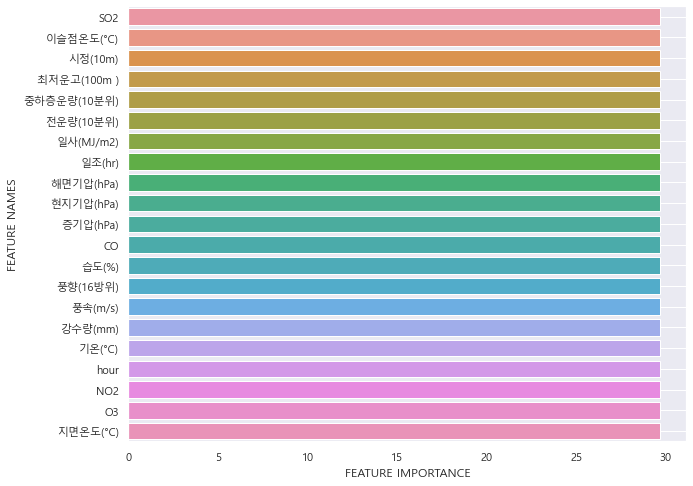

In [65]:
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)

# 다시 모델링
model7 = LinearRegression()
model7.fit(x_train_s, y_train)

print(model7.coef_[0])
r = plot_feature_importance(model7.coef_[0], list(x_train))

### 나. 다음은 앙상블 기법을 토대로 랜덤포레스트와 그라디언브스팅을 활용해봅시다.

#### 1) 렌덤포레스트
##### 배깅의 일종으로 의사결정나무(Decision Tree) 여러 개를 모아서 숲을 랜덤으로 구성하고 이를 종합해서 최종 모델을 산출하는 기법이라고 할 수 있다.

#### [실습문제3] 머신러닝_2
* Train과 Test로 나눈 데이터를 기준으로 렌덤포레스트로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : RMSE, R-squared Score(소수점 5째자리까지, 반올림)

In [66]:
# 아래에 실습코드를 작성하세요.
params2 = {'n_estimators' : range(10,101,10)}
model2 = GridSearchCV(RandomForestRegressor(), params2, cv=10)
model2.fit(x_train, y_train)
pred2 = model2.predict(x_val)
printPerform1(y_val, pred2)

r2 score :  0.86498
RMSE :  17.47256
MAE :  8.26344
MAPE :  0.2875
정확도 :  71.24987


In [67]:
print(model2.best_params_)
print(model2.best_score_)

{'n_estimators': 50}
0.8362587490528958


In [68]:
model2_1 = RandomForestRegressor(n_estimators = 50)
model2_1.fit(x_train, y_train)
pred2_1 = model2_1.predict(x_val)
printPerform1(y_val, pred2_1)

r2 score :  0.87222
RMSE :  16.99753
MAE :  8.26359
MAPE :  0.29844
정확도 :  70.15597


In [84]:
# Test 데이터로 성능을 평가해보세요.
models = joblib.load('./RFmodel3.pkl')
pred = models.predict(test_x)
printPerform1(test_y, pred)



r2 score :  0.54075
RMSE :  15.9293
MAE :  10.30495
MAPE :  0.44266
정확도 :  55.73398


In [83]:
# 학습한 모델을 파일로 저장해보세요.
joblib.dump(model2_1, './RFmodel3.pkl')

['./RFmodel3.pkl']

#### [실습문제4] 머신러닝_3
* 렌덤포레스트로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

,feature_names,feature_importance
0,시정(10m),0.253485
1,전운량(10분위),0.113863
2,해면기압(hPa),0.104561
3,습도(%),0.089530
4,CO,0.076106
5,현지기압(hPa),0.074850
6,이슬점온도(°C),0.045389
7,O3,0.041172
8,증기압(hPa),0.036764
9,최저운고(100m ),0.033412


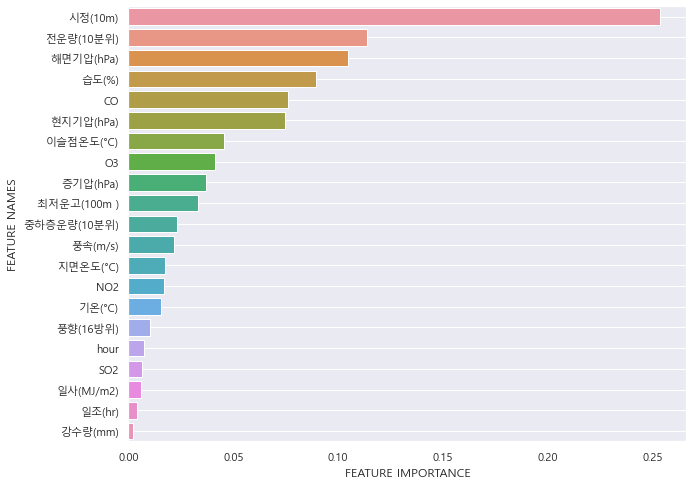

In [69]:
# Feature의 중요도 확인
plot_feature_importance(model2_1.feature_importances_, list(x_train))

In [ ]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### 2) GradientBoosting
##### 앞선 모델의 에러를 다음 모델의 예측 값으로 활용하면서 가중치 업데이트 하는데 경사하강법(Gradient Descent)를 활용해서 최적 모델을 만드는 기법

#### [실습문제5] 머신러닝_4
* Train과 Test로 나눈 데이터를 기준으로 그라디언트부스팅으로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : RMSE, R-squared Score(소수점 5째자리까지, 반올림)

In [70]:
# 아래에 실습코드를 작성하세요.
params3 = {'learning_rate': list(np.arange(0.1, 1, 0.1)), 'n_estimators': list(range(101, 211, 10))}
model3 = GridSearchCV(GradientBoostingRegressor(), params3, cv=10)
model3.fit(x_train, y_train)
pred3 = model3.predict(x_val)
printPerform1(y_val, pred3)

r2 score :  0.8011
RMSE :  21.207
MAE :  10.99627
MAPE :  0.39215
정확도 :  60.785


In [71]:
print(model3.best_params_)
print(model3.best_score_)

{'learning_rate': 0.2, 'n_estimators': 201}
0.7774293524749438


In [72]:
model3_1 = GradientBoostingRegressor(learning_rate = 0.2, n_estimators=201)
model3_1.fit(x_train, y_train)
pred3_1 = model3_1.predict(x_val)
printPerform1(y_val, pred3_1)

r2 score :  0.80189
RMSE :  21.16487
MAE :  10.9873
MAPE :  0.39213
정확도 :  60.78692


In [86]:
# Test 데이터로 성능을 평가해보세요.
models = joblib.load('./GBmodel3.pkl')
pred = models.predict(test_x)
printPerform1(test_y, pred)

r2 score :  0.27826
RMSE :  19.96924
MAE :  11.45838
MAPE :  0.49845
정확도 :  50.15458


In [85]:
# 학습한 모델을 파일로 저장해보세요.
joblib.dump(model3_1, './GBmodel3.pkl')

['./GBmodel3.pkl']

#### [실습문제6] 머신러닝_5
* 그라디언트부스팅으로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

,feature_names,feature_importance
0,시정(10m),0.270611
1,전운량(10분위),0.134659
2,해면기압(hPa),0.126884
3,최저운고(100m ),0.113024
4,습도(%),0.094182
5,CO,0.071655
6,현지기압(hPa),0.070599
7,이슬점온도(°C),0.049163
8,SO2,0.010047
9,기온(°C),0.009588


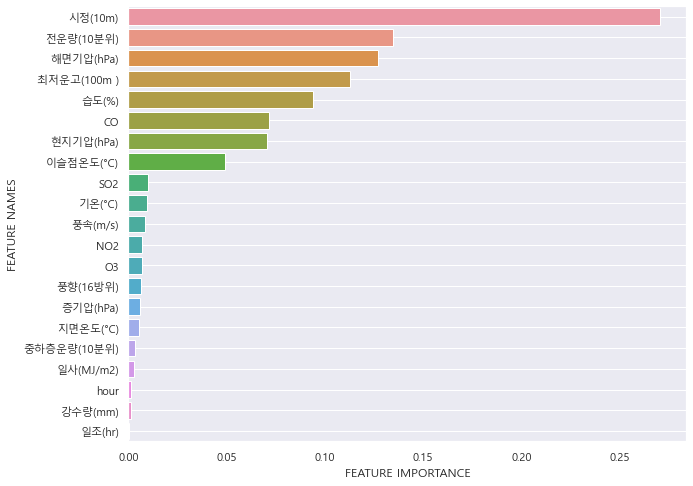

In [73]:
# Feature의 중요도 확인
plot_feature_importance(model3_1.feature_importances_, list(x_train))

In [ ]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### 3) Self Choice Model
##### 앞선 교육과정에서 배운 머신러닝 모델 중 어떤 것이든 좋습니다. 원하는 모델을 선택해서 학습을 시켜보세요.

#### [실습문제7] 머신러닝_6
* Train과 Test로 나눈 데이터를 기준으로 Self Choice Model로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : RMSE, R-squared Score(소수점 5째자리까지, 반올림)

In [74]:
y_train_t.shape, y_val_t.shape

((7458,), (1300,))

In [75]:
# 아래에 실습코드를 작성하세요.
from itertools import product
p = [1,2,3,4]
q = [1,2,3,4]
d = [1]
iter = list(product(p,d,q))
iter
mae, aic = [],[]
for i in iter :
    model_fit = sm.tsa.SARIMAX(y_train_t, order=(i[0],i[1],i[2])).fit()
    pred = model_fit.forecast(1300)
    mae.append( mean_absolute_error(y_val_t, pred))
    aic.append(model_fit.aic)
    print(i)

(1, 1, 1)
(1, 1, 2)
(1, 1, 3)
(1, 1, 4)
(2, 1, 1)
(2, 1, 2)
(2, 1, 3)
(2, 1, 4)
(3, 1, 1)
(3, 1, 2)
(3, 1, 3)
(3, 1, 4)
(4, 1, 1)
(4, 1, 2)
(4, 1, 3)
(4, 1, 4)


In [76]:
result = pd.DataFrame({'params(p,d,q)' : iter, 'mae' : mae, 'aic':aic})

display(result.loc[result['mae'] == result.mae.min()])
display(result.loc[result['aic'] == result.aic.min()])

,"params(p,d,q)",mae,aic
10,"(3, 1, 3)",21.048077,52174.888168


,"params(p,d,q)",mae,aic
7,"(2, 1, 4)",21.127,52168.55962


In [77]:
# mae가 작은 것을 선택
P = [1,2,3,4,5]
Q = [1,2,3,4,5]
D = [1]
mae, aic = [],[]
iter = list(product(P,D,Q))

for i in iter :
    model_fit = sm.tsa.SARIMAX(y_train_t, order=(3,1,3), seasonal_order=(i[0],i[1],i[2],7)).fit()
    pred = model_fit.forecast(1300)
    mae.append(mean_absolute_error(y_val_t, pred))
    aic.append(model_fit.aic)
    print(i)

(1, 1, 1)
(1, 1, 2)
(1, 1, 3)
(1, 1, 4)
(1, 1, 5)
(2, 1, 1)
(2, 1, 2)
(2, 1, 3)
(2, 1, 4)
(2, 1, 5)
(3, 1, 1)
(3, 1, 2)
(3, 1, 3)
(3, 1, 4)
(3, 1, 5)
(4, 1, 1)
(4, 1, 2)
(4, 1, 3)


KeyboardInterrupt: 

In [79]:
print(mae)

[28.1546161943079, 28.181694688219263, 27.655129194846836, 25.3068947542719, 28.259078514642326, 24.310994934654353, 25.346033466191336, 20.74929174174232, 19.96283884096268, 20.250428114601856, 20.005893225568038, 21.146944292393666, 21.285216618160575, 22.71387204806675, 22.21217750336367, 20.12283359751953, 20.317501942894165, 26.37331083715768]


In [80]:
print(aic)

[52190.12416356759, 52219.270154756276, 52214.64872449395, 52198.064377733695, 52166.81537414887, 52172.80489747057, 52239.75487602115, 52196.90177009488, 52194.775153798866, 52193.640796045336, 52197.91964535773, 52198.546497372176, 52203.466863101145, 52359.16701016133, 52349.97853318319, 52211.30385509457, 52223.09097944257, 52235.218810704595]


In [81]:
model_fit = sm.tsa.SARIMAX(y_train_t, order=(3,1,3), seasonal_order=(2,1,4,7)).fit()
pred = model_fit.forecast(1300)
printPerform1(y_val_t, pred)

r2 score :  -0.01378
RMSE :  30.08544
MAE :  19.96284
MAPE :  0.61936
정확도 :  38.06431


In [78]:
result = pd.DataFrame({'params(P,D,Q)' : iter, 'mae' : mae, 'aic':aic})

display(result.loc[result['mae'] == result.mae.min()])
display(result.loc[result['aic'] == result.aic.min()])

ValueError: All arrays must be of the same length

In [ ]:
# aic가 작은 것을 선택
P = [1,2,3,4,5]
Q = [1,2,3,4,5]
D = [1]
mae, aic = [],[]
iter = list(product(P,D,Q))

for i in iter :
    model_fit = sm.tsa.SARIMAX(y_train_t, order=(2,1,4), seasonal_order=(i[0],i[1],i[2],7)).fit()
    pred = model_fit.forecast(1300)
    mae.append(mean_absolute_error(y_val_t, pred))
    aic.append(model_fit.aic)
    print(i)

In [ ]:
result = pd.DataFrame({'params(P,D,Q)' : iter, 'mae' : mae, 'aic':aic})

display(result.loc[result['mae'] == result.mae.min()])
display(result.loc[result['aic'] == result.aic.min()])

In [ ]:
# Test 데이터로 성능을 평가해보세요.





In [ ]:
# 학습한 모델을 파일로 저장해보세요.





#### [실습문제8] 머신러닝_7
* Self Choice Model로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

In [ ]:
# Feature의 중요도 확인





In [ ]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.